In [50]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [51]:
class QuadraticCoefficients(TypedDict):
    a: float
    b: float
    c: float

    equation: str
    discriminant: float
    result: str

In [52]:
def showequation(state: QuadraticCoefficients) -> QuadraticCoefficients:
    a = state["a"]
    b = state["b"]
    c = state["c"]

    equation = f"{a}x^2 + {b}x + {c} = 0"
    return {"equation": equation}

def calculate_discriminant(state: QuadraticCoefficients) -> QuadraticCoefficients:
    a = state["a"]
    b = state["b"]
    c = state["c"]

    discriminant = b**2 - 4*a*c
    return {"discriminant": discriminant}

def real_roots(state: QuadraticCoefficients) -> QuadraticCoefficients:
    a = state["a"]
    b = state["b"]
    c = state["c"]

    root1 = (-b + state["discriminant"]**0.5) / (2*a)
    root2 = (-b - state["discriminant"]**0.5) / (2*a)

    result = f"Two real roots: {root1} and {root2}"
    return {"result": result}

def repeated_root(state: QuadraticCoefficients) -> QuadraticCoefficients:
    a = state["a"]
    b = state["b"]

    root = -b / (2*a)
    result = f"One repeated root: {root}"
    return {"result": result}

def no_real_roots(state: QuadraticCoefficients) -> QuadraticCoefficients:
    result = "No real roots"
    return {"result": result}

def check_discriminant(state: QuadraticCoefficients) -> Literal["real_roots", "repeated_root", "no_real_roots"]:
    discriminant = state["discriminant"]

    if discriminant > 0:
        return "real_roots"
    elif discriminant == 0:
        return "repeated_root"
    else:
        return "no_real_roots"



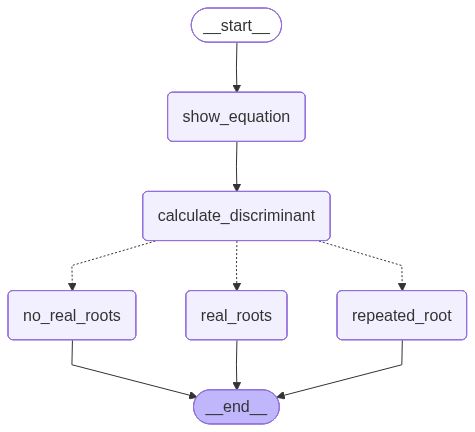

In [53]:
graph = StateGraph(QuadraticCoefficients)

# define nodes
graph.add_node("show_equation", showequation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_root", repeated_root)
graph.add_node("no_real_roots", no_real_roots)

#edges
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_conditional_edges("calculate_discriminant", check_discriminant)
graph.add_edge("real_roots", END)
graph.add_edge("repeated_root", END)
graph.add_edge("no_real_roots", END)

workflow = graph.compile()

from IPython.display import Image
Image(workflow.get_graph().draw_mermaid_png())

In [55]:
initial_state = {
    "a" : 2,
    "b" : 4,
    "c" : 2
}

result = workflow.invoke(initial_state)
print(result)

{'a': 2, 'b': 4, 'c': 2, 'equation': '2x^2 + 4x + 2 = 0', 'discriminant': 0, 'result': 'One repeated root: -1.0'}
